# DSDBAL MINI PROJECT 

### Performing Data Analysis on Vaccine Data 


#### *GROUP MEMBERS:* 
#### 31448 Yashraj Lad
#### 31455 Misbah Bagwan
#### 31456 Prathamesh Naik


## 1. Importing all the required Python Libraries.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset into pandas’ data frame

In [123]:
df = pd.read_csv('Vaccination_Rates_by_Neighborhood.csv')

In [124]:
df.head()

,CITY_TYPE,CITY,COMMUNITY,LABEL,City_Community,Cases,Case_Rate,Deaths,Death_Rate,Percent_of_People_with_1__Dose,Percent_of_People_Fully_Vaccinated
0,City,Agoura Hills,,City of Agoura Hills,City of Agoura Hills,4220,20208.0,22,105.0,0.85,0.80
1,City,Alhambra,,City of Alhambra,City of Alhambra,17044,19653.0,255,294.0,0.87,0.81
2,City,Arcadia,,City of Arcadia,City of Arcadia,8145,14103.0,165,286.0,0.91,0.84
3,City,Artesia,,City of Artesia,City of Artesia,4186,24924.0,88,524.0,0.87,0.80
4,City,Avalon,,City of Avalon,City of Avalon,63,1628.0,0,0.0,0.27,0.23


### 2.1 Dimesnions of Dataset


In [125]:
df.shape

(341, 11)

### 2.2 Variable Description and their types

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CITY_TYPE                           341 non-null    object 
 1   CITY                                341 non-null    object 
 2   COMMUNITY                           341 non-null    object 
 3   LABEL                               341 non-null    object 
 4   City_Community                      341 non-null    object 
 5   Cases                               341 non-null    int64  
 6   Case_Rate                           339 non-null    float64
 7   Deaths                              341 non-null    int64  
 8   Death_Rate                          339 non-null    float64
 9   Percent_of_People_with_1__Dose      340 non-null    float64
 10  Percent_of_People_Fully_Vaccinated  340 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usa

Dataset Overview:

Location Info: CITY_TYPE, CITY, COMMUNITY, LABEL, City_Community

COVID-19 Data: Cases, Case_Rate, Deaths, Death_Rate

Vaccination Rates: Percent_of_People_with_1__Dose, Percent_of_People_Fully_Vaccinated
missing).



1.	CITY_TYPE: Categorical label indicating if the area is a "City" or "Unincorporated" region.

2.	CITY: Name of the city or municipality (e.g., "Los Angeles", "Beverly Hills").

3.	COMMUNITY: Neighborhood name within a city (blank for standalone cities).

4.	LABEL: Formal geographic designation (e.g., "City of Agoura Hills").

5.	City_Community: Combined city/neighborhood identifier for precise location.

6.	Cases: Total number of COVID-19 cases reported in the area.

7.	Case_Rate: COVID-19 cases per 100,000 population (2 missing values).

8.	Deaths: Total COVID-19 deaths reported in the area.

9.	Death_Rate: COVID-19 deaths per 100,000 population (2 missing values).

10.	Percent_of_People_with_1__Dose: Proportion of population with ≥1 vaccine dose (1 missing).

11.	Percent_of_People_Fully_Vaccinated: Proportion fully vaccinated (1 missing).


### 2.3 Statistical Summary 

In [127]:
df.describe()

,Cases,Case_Rate,Deaths,Death_Rate,Percent_of_People_with_1__Dose,Percent_of_People_Fully_Vaccinated
count,341.000000,339.000000,341.000000,339.000000,340.000000,340.000000
mean,8180.964809,29345.171091,93.272727,380.920354,0.699529,0.683088
std,11987.991290,39349.567669,137.122033,1382.866199,0.254973,0.186643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,753.000000,19171.000000,6.000000,144.000000,0.720000,0.660000
50%,3998.000000,24942.000000,38.000000,264.000000,0.785000,0.720000
75%,10573.000000,31555.000000,132.000000,374.000000,0.840000,0.780000
max,125823.000000,541667.000000,1264.000000,24074.000000,0.950000,0.950000


FINDINGS : 

1.Average Area had 8180 cases 

2.Typical COVID death count was 93 (but some areas had 1,264 deaths)

3.Average area had 29,345 cases per 100k people (29% of population got COVID)

4.Death rate averaged 381 per 100k (~0.4% of population)

5.On average, 70% got at least 1 dose, 68% were fully vaccinated

6.Some area had 95% vaccination rate while other had 0%,this could likely be missing data 

CONCLUSION:

-> some places got hit much harder by COVID as there was huge variation

-> Vaccination rates were decent overall (70%+) but inconsistent


In [128]:
import pandas as pd


numerical_data = df[['Cases','Case_Rate','Deaths','Death_Rate']]  


stats = {
    'Range': numerical_data.max() - numerical_data.min(),
    'Variance': numerical_data.var(),
    'Standard Deviation': numerical_data.std(),
    'Quartiles': numerical_data.quantile([0.25, 0.5, 0.75])
}


for stat_name, values in stats.items():
    print(f"{stat_name} ")
    print(values.round(2))  
    print("\n")

Range 
Cases         125823.0
Case_Rate     541667.0
Deaths          1264.0
Death_Rate     24074.0
dtype: float64


Variance 
Cases         1.437119e+08
Case_Rate     1.548388e+09
Deaths        1.880245e+04
Death_Rate    1.912319e+06
dtype: float64


Standard Deviation 
Cases         11987.99
Case_Rate     39349.57
Deaths          137.12
Death_Rate     1382.87
dtype: float64


Quartiles 
        Cases  Case_Rate  Deaths  Death_Rate
0.25    753.0    19171.0     6.0       144.0
0.50   3998.0    24942.0    38.0       264.0
0.75  10573.0    31555.0   132.0       374.0




OBSERVATIONS :

Extreme disparity between worst-hit (125k cases) and unaffected areas (0 cases). 

Huge variability in case counts. Driven by population density differences

Top quartile case counts (10,573+) suggest dense urban areas were hotspots.


## 3.Data Preprocessing

### 3.1. Scanning all variables for missing values and inconsistencies.

#### Handling Missing Values

In [130]:
df.isnull().sum()

CITY_TYPE                             0
CITY                                  0
COMMUNITY                             0
LABEL                                 0
City_Community                        0
Cases                                 0
Case_Rate                             2
Deaths                                0
Death_Rate                            2
Percent_of_People_with_1__Dose        1
Percent_of_People_Fully_Vaccinated    1
dtype: int64

There are a total of 6 missing values in 'Case_Rate', 'Death_Rate', 'Percent_of_People_with_1__Dose', 'Percent_of_People_Fully_Vaccinated' columns

#### Imputing Missing values with Median Value 

In [131]:
null_features1 = ['Case_Rate', 'Death_Rate']

for col in null_features1:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

For Case_Rate and Death_Rate (numeric data):

Filled missing values with the median (to avoid influence from extreme values).

#### Imputing Missing values with Mean Value 

In [132]:
null_features2 = ['Percent_of_People_with_1__Dose', 'Percent_of_People_Fully_Vaccinated']

for col in null_features2:
    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val)

For Percent_of_People_with_1__Dose and Percent_of_People_Fully_Vaccinated:

Filled missing values with the mean (since these are percentage values and tend to be normally distributed).

In [133]:
df.isnull().sum()

CITY_TYPE                             0
CITY                                  0
COMMUNITY                             0
LABEL                                 0
City_Community                        0
Cases                                 0
Case_Rate                             0
Deaths                                0
Death_Rate                            0
Percent_of_People_with_1__Dose        0
Percent_of_People_Fully_Vaccinated    0
dtype: int64

In [137]:
# Quick sanity check
df_clean[['Cases', 'Case_Rate', 'Deaths', 'Death_Rate']].describe().round(2)

,Cases,Case_Rate,Deaths,Death_Rate
count,322.00,322.00,322.00,322.00
mean,8049.30,26169.00,90.30,252.87
std,10264.55,23705.13,122.12,147.14
min,0.00,0.00,0.00,0.00
25%,875.50,18830.00,6.00,128.00
50%,4069.50,24268.50,38.00,244.00
75%,10988.25,31146.50,132.00,356.75
max,54213.00,400000.00,870.00,637.00


In [138]:
df_clean=df

## 4.Data Visualization

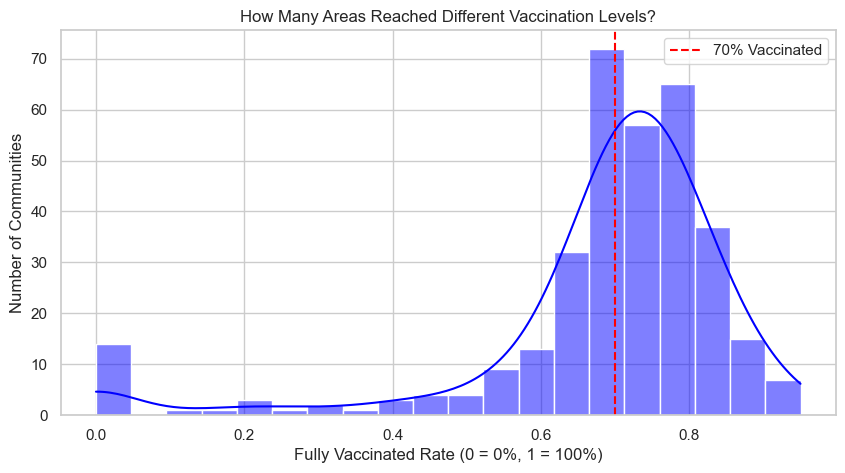

In [139]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_clean, x='Percent_of_People_Fully_Vaccinated', bins=20, color='blue', kde=True)
plt.title('How Many Areas Reached Different Vaccination Levels?')
plt.xlabel('Fully Vaccinated Rate (0 = 0%, 1 = 100%)')
plt.ylabel('Number of Communities')
plt.axvline(0.7, color='red', linestyle='--', label='70% Vaccinated')
plt.legend()
plt.show()

The red dashed line indicates that many areas have not yet reached the 70% threshold, which is often considered critical for herd immunity.

The majority of communities fall below the 70% vaccination mark, highlighting a need for increased vaccination efforts.

Some communities are below 0.3 and above 0.8 (few extremes)

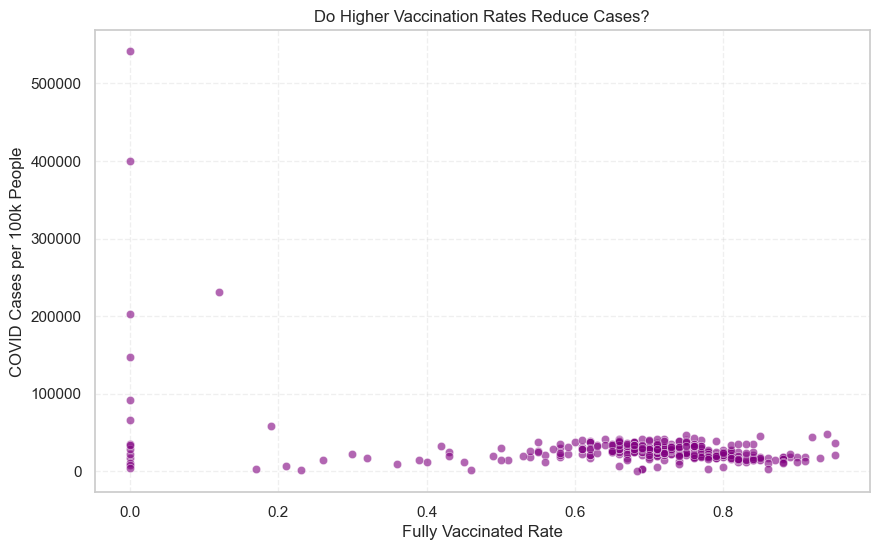

In [140]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean,
    x='Percent_of_People_Fully_Vaccinated',
    y='Case_Rate',
    alpha=0.6,
    color='purple'
)
plt.title('Do Higher Vaccination Rates Reduce Cases?')
plt.xlabel('Fully Vaccinated Rate')
plt.ylabel('COVID Cases per 100k People')
plt.grid(linestyle='--', alpha=0.3)
plt.show()

communities with higher vaccination rates (approaching 1 or 100%) tend to have significantly lower COVID-19 case rates.

Most data points cluster at lower case rates as vaccination rates increase, suggesting a potential negative correlation.
The scatter plot highlights a trend suggesting that higher vaccination rates are associated with lower COVID-19 case rates.

I
ncreasing vaccination rates can lead to a significant reduction in COVID cases, supporting vaccine effectiveness. 

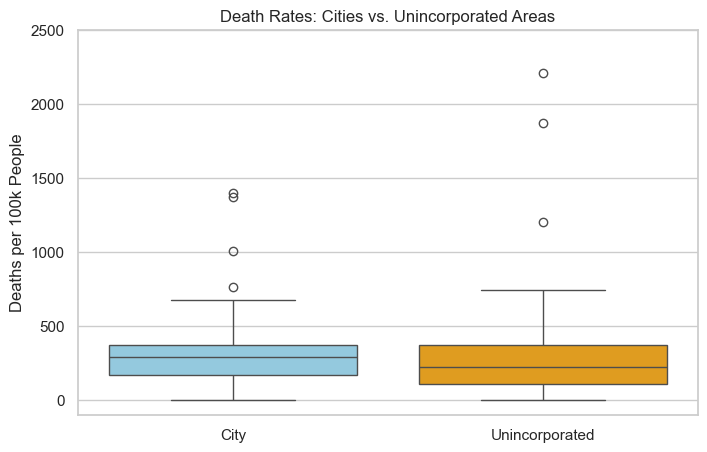

In [185]:
import matplotlib.pyplot as plt  
import seaborn as sns  

plt.figure(figsize=(8, 5))  


sns.boxplot(  
    data=df_clean,  
    x='CITY_TYPE',  
    y='Death_Rate',  
    hue='CITY_TYPE',  
    palette=['skyblue', 'orange']  
)  


plt.ylim(-100, 2500)



plt.title('Death Rates: Cities vs. Unincorporated Areas')  
plt.xlabel('')  
plt.ylabel('Deaths per 100k People')  
plt.show()  

Cities have a slightly higher median death rate compared to Unincorporated Areas,
                     
indicating cities may experience more deaths per capita.

Cities have both Higher Case rate and higher death rate suggesting severe outbreak in urban hotspots 

hwoever rural areas alsorecorded death likely due to healthcase system gaps

Both categories contain outliers, indicating that some communities within each type 

have significantly higher death rates than the majority.



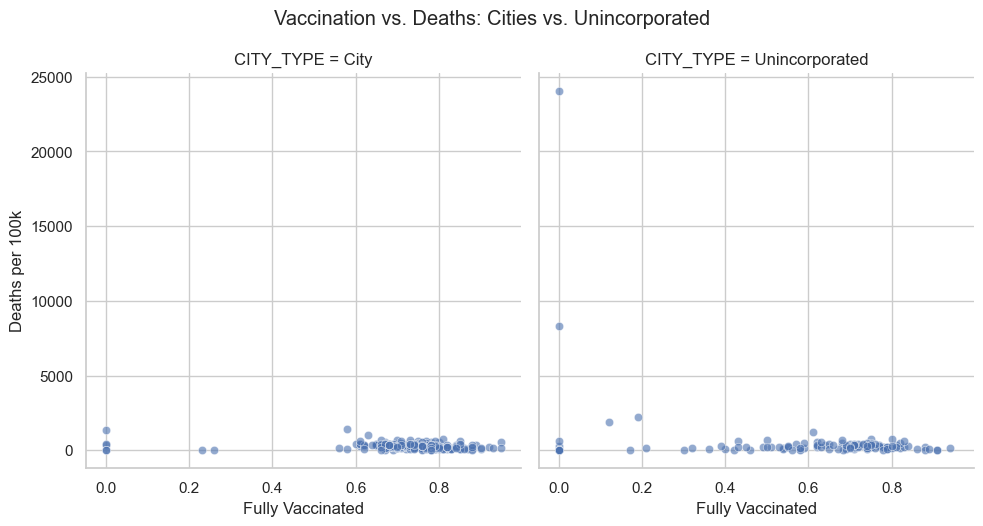

In [142]:
g = sns.FacetGrid(df_clean, col='CITY_TYPE', height=5)
g.map(sns.scatterplot, 'Percent_of_People_Fully_Vaccinated', 'Death_Rate', alpha=0.6)
g.set_axis_labels("Fully Vaccinated", "Deaths per 100k")
g.fig.suptitle('Vaccination vs. Deaths: Cities vs. Unincorporated', y=1.05)
plt.show()

Findings:

Cities (Left): Stronger downward trend (vaccination clearly reduces deaths).

As vaccination rates increase, a slight downward trend in death rates can be observed, 

though several high death rates remain even with higher vaccination percentages.

Unincorporated (Right): Similar to cities, there is a trend of decreasing death rates with increasing vaccination. 

However, the spread of death rates is less pronounced, indicating more consistent lower death rates across higher vaccination percentages.




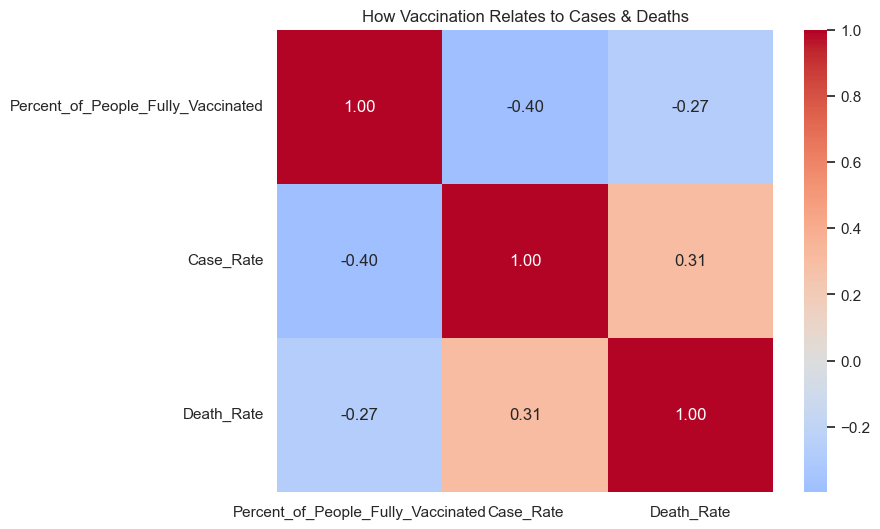

In [143]:
corr_matrix = df_clean[[
    'Percent_of_People_Fully_Vaccinated',
    'Case_Rate',
    'Death_Rate'
]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('How Vaccination Relates to Cases & Deaths')
plt.show()

Correlation Values :

Case Rate vs. Death Rate: Moderate Positive correlation 

Vaccination vs. Case Rate: Moderate negative correlation.

Vaccination vs. Death Rate: Weak negative correlation.


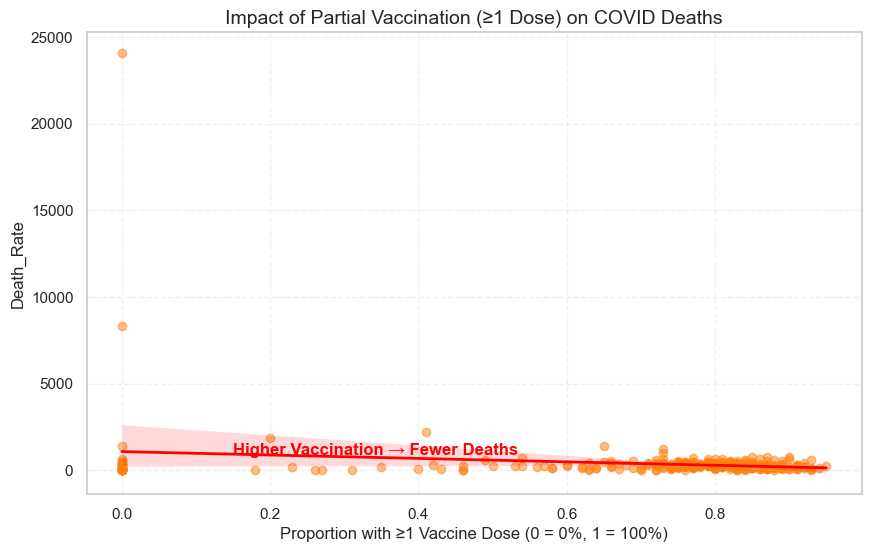

In [186]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x='Percent_of_People_with_1__Dose',
    y='Death_Rate',
    scatter_kws={'alpha': 0.5, 'color': '#FF7F0E'},  
    line_kws={'color': 'red', 'linewidth': 2},       
    ci=95 
)
plt.title('Impact of Partial Vaccination (≥1 Dose) on COVID Deaths', fontsize=14)
plt.xlabel('Proportion with ≥1 Vaccine Dose (0 = 0%, 1 = 100%)', fontsize=12)

plt.grid(linestyle='--', alpha=0.3)

plt.text(0.15, 900, "Higher Vaccination → Fewer Deaths", 
         fontsize=12, color='red', weight='bold')
# plt.text(0.6, 500, "Outliers: Areas with high deaths\n despite vaccination", 
         # fontsize=10, color='#FF7F0E')

plt.show()


Negative Correlation: There is a visible negative trend, indicating that 

as the proportion of vaccinated individuals increases, the death rate generally decreases.

The red trendline illustrates this trend, indicating a potential protective effect of vaccination against COVID-19 deaths.

The transparency of the points suggests that many regions cluster around lower vaccination rates and higher death rates.


In [193]:

top10_vax = df_clean.nlargest(10, 'Percent_of_People_Fully_Vaccinated')[
    ['CITY', 'COMMUNITY', 'Percent_of_People_Fully_Vaccinated']
].sort_values('Percent_of_People_Fully_Vaccinated', ascending=False)


top10_vax['Location'] = top10_vax['CITY'] + ' - ' + top10_vax['COMMUNITY'].fillna('(Citywide)')

C:\Users\LDIN\AppData\Local\Temp\ipykernel_1660\3167668710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


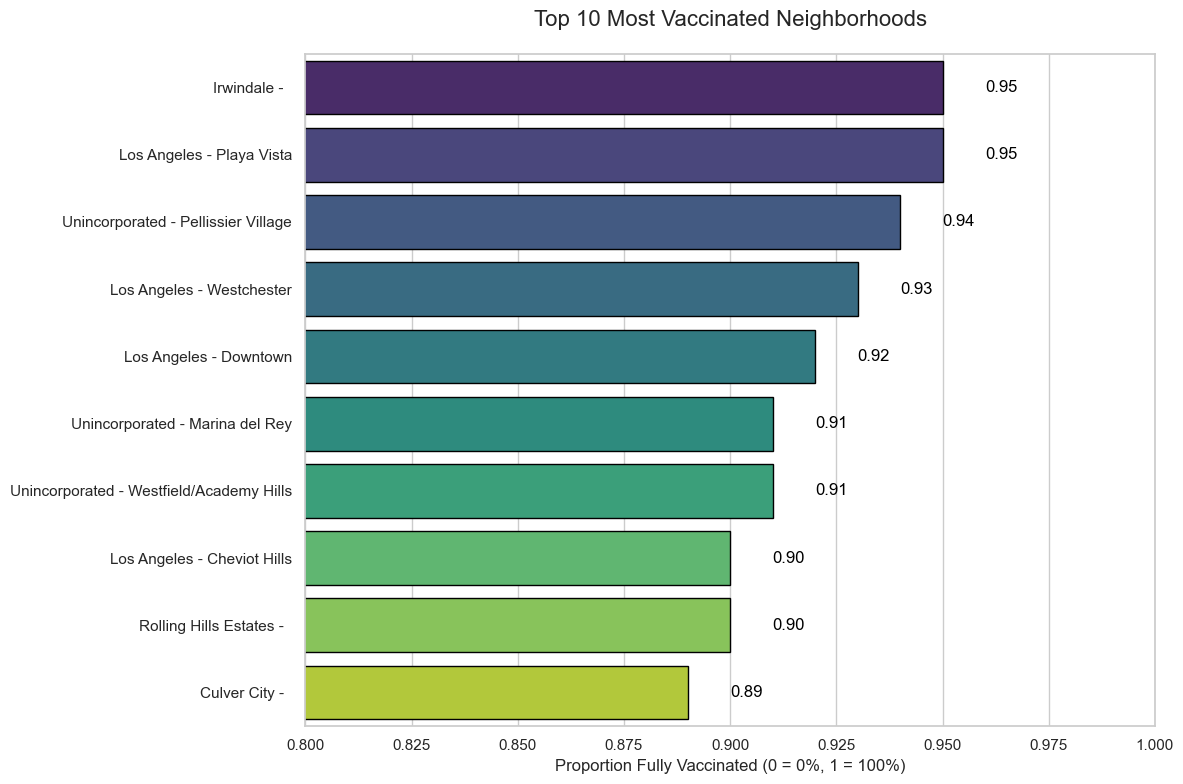

In [197]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top10_vax,
    x='Percent_of_People_Fully_Vaccinated',
    y='Location',
    palette='viridis',  
    edgecolor='black'
)

plt.title('Top 10 Most Vaccinated Neighborhoods', fontsize=16, pad=20)
plt.xlabel('Proportion Fully Vaccinated (0 = 0%, 1 = 100%)', fontsize=12)
plt.ylabel('')
plt.xlim(0.8, 1.0)  


for i, v in enumerate(top10_vax['Percent_of_People_Fully_Vaccinated']):
    plt.text(v + 0.01, i, f"{v:.2f}", color='black', ha='left', va='center')

plt.tight_layout()
plt.show()

High Vaccination Rates: Most neighborhoods listed are close to 1.0, showing strong vaccination uptake.
    
Top Neighborhoods: Both Irvine and Los Angeles - Playa Vista are tied for the highest vaccination rate at 0.95


In [208]:

top10_deaths = df_clean.nlargest(10, 'Death_Rate')[
    ['CITY', 'COMMUNITY', 'Death_Rate', 'Percent_of_People_Fully_Vaccinated']
].sort_values('Death_Rate', ascending=False)


top10_deaths['Location'] = top10_deaths['CITY'] + ' - ' + top10_deaths['COMMUNITY'].fillna('(Citywide)')



C:\Users\LDIN\AppData\Local\Temp\ipykernel_1660\4006530252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


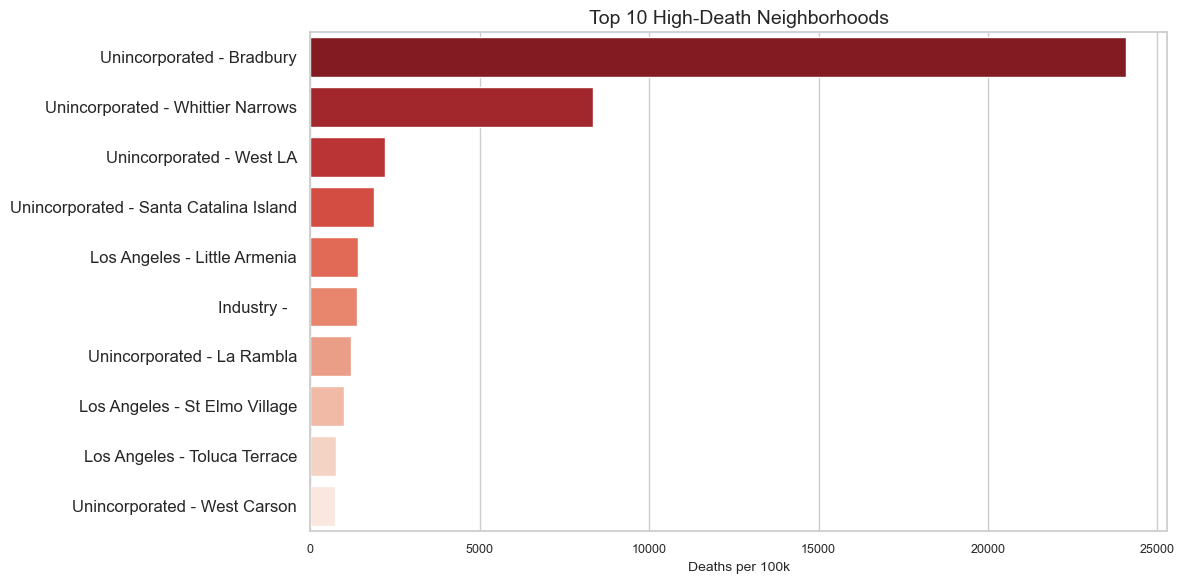

In [222]:
plt.figure(figsize=(12, 6)) 

barplot = sns.barplot(
    data=top10_deaths,
    x='Death_Rate',
    y='Location',
    palette='Reds_r'
)


plt.title('Top 10 High-Death Neighborhoods', fontsize=14)
plt.xlabel('Deaths per 100k', fontsize=10)
plt.ylabel('')
plt.xticks(fontsize=9)
plt.yticks(fontsize=12) 


# plt.yticks(rotation=45, ha='right')  

plt.tight_layout()  
plt.show()



Highest Death Rate: Bradbury has the highest death rate, significantly surpassing other neighborhoods.
    
Other Areas: Many unincorporated areas appear prominently, highlighting potential issues in healthcare access

or vaccination rates in these regions.

C:\Users\LDIN\AppData\Local\Temp\ipykernel_1660\3785187043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


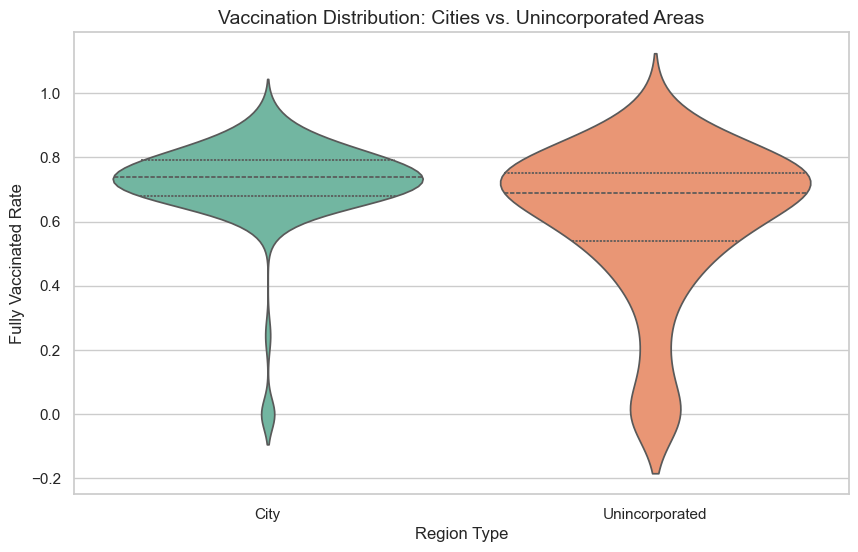

In [223]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x='CITY_TYPE',
    y='Percent_of_People_Fully_Vaccinated',
    palette='Set2',
    inner='quartile' 
)
plt.title('Vaccination Distribution: Cities vs. Unincorporated Areas', fontsize=14)
plt.xlabel('Region Type', fontsize=12)
plt.ylabel('Fully Vaccinated Rate', fontsize=12)
plt.show()

The narrow points at the bottom of the violins indicate lower vaccination rates, 

while the wide sections show higher rates.

Cities: Signal higher vaccination rates, with a more consistent spread among the population.
    
Unincorporated Areas: Show a wider variation in rates, indicating some have very low rates while others are higher.

A longer tail means there are some areas with very low vaccination rates.

A shorter tail suggests that most people are concentrated around higher vaccination rates

For Cities: The tail is long and thin, showing some people with very low vaccination rates

but a majority are clustered around higher rates.

For Unincorporated Areas: The tail is broader, indicating a wider range of vaccination rates

 with some areas having very low rates compared to others.


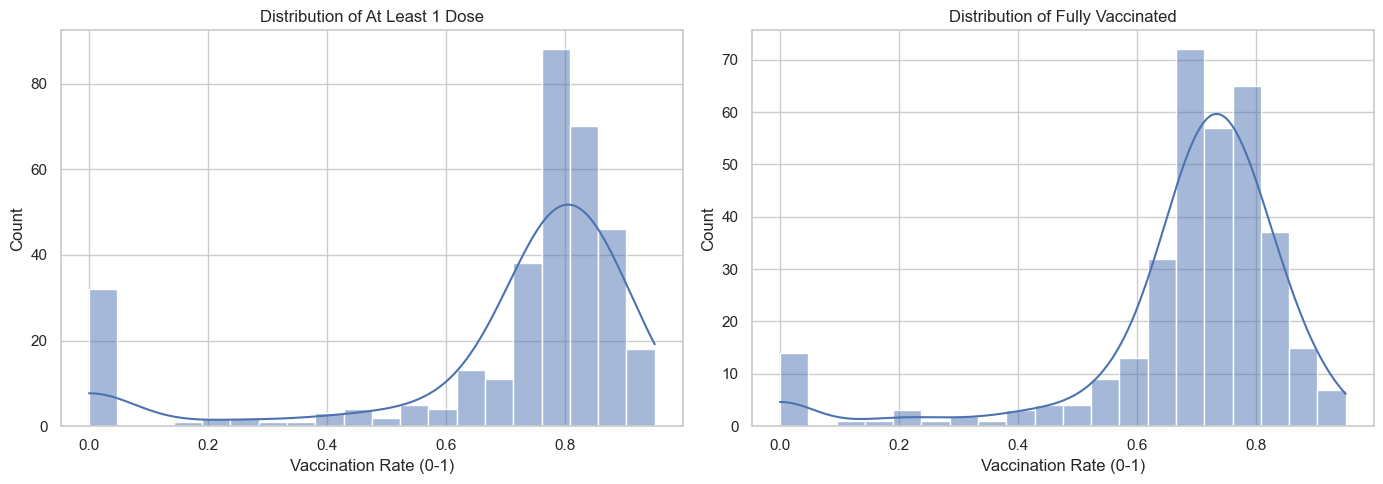

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.histplot(data=df, x="Percent_of_People_with_1__Dose", bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of At Least 1 Dose")
axes[0].set_xlabel("Vaccination Rate (0-1)")


sns.histplot(data=df, x="Percent_of_People_Fully_Vaccinated", bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Fully Vaccinated")
axes[1].set_xlabel("Vaccination Rate (0-1)")

plt.tight_layout()
plt.show()

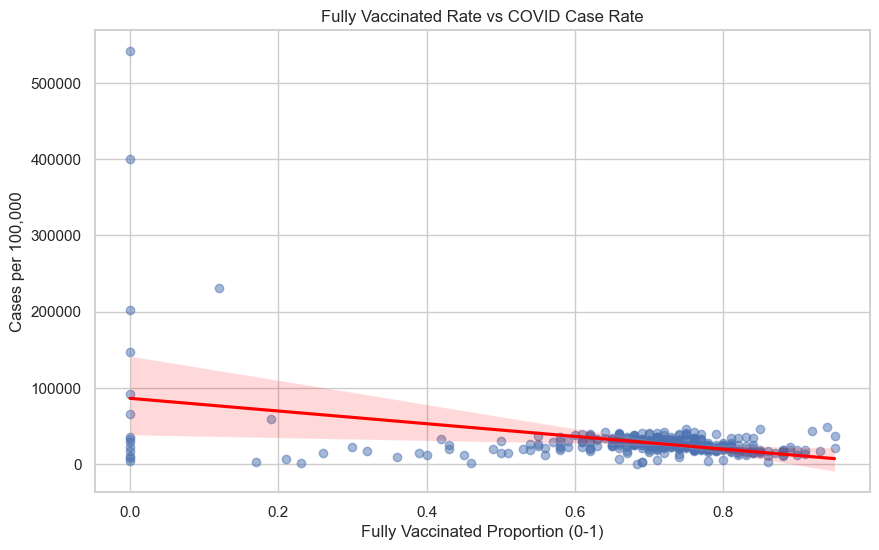

In [225]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x="Percent_of_People_Fully_Vaccinated",
    y="Case_Rate",
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title("Fully Vaccinated Rate vs COVID Case Rate")
plt.xlabel("Fully Vaccinated Proportion (0-1)")
plt.ylabel("Cases per 100,000")
plt.show()

Insights:
Higher Vaccination Rates: Areas with higher vaccination rates (towards the right) generally have fewer COVID cases, 

suggesting that vaccination is associated with lower infection rates.

Lower Vaccination Rates: Areas with low vaccination rates (towards the left)

exhibit a wide range of case rates, including very high numbers.

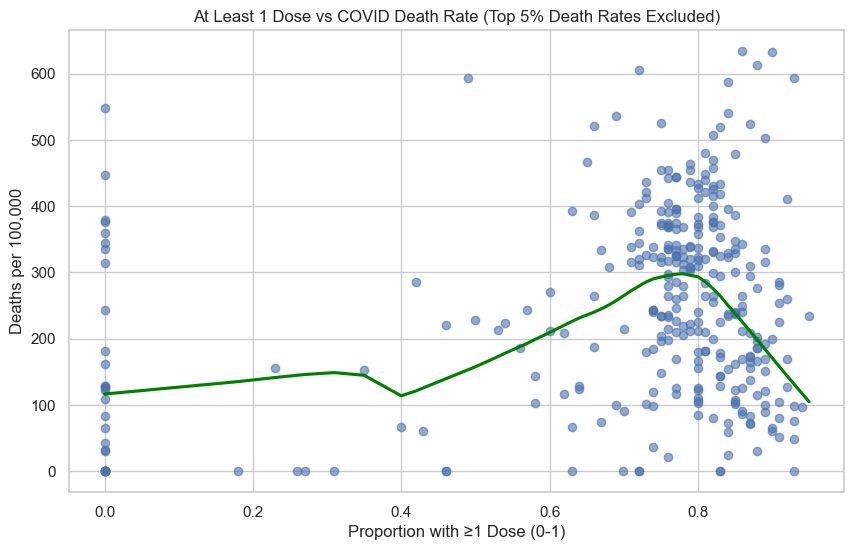

In [226]:
df_clean = df[df['Death_Rate'] < df['Death_Rate'].quantile(0.95)]

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x="Percent_of_People_with_1__Dose",
    y="Death_Rate",
    lowess=True, 
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'green'}
)
plt.title("At Least 1 Dose vs COVID Death Rate (Top 5% Death Rates Excluded)")
plt.xlabel("Proportion with ≥1 Dose (0-1)")
plt.ylabel("Deaths per 100,000")
plt.show()

Local Regression: The line is generated using local regression (LOWESS),

allowing it to capture non-linear trends rather than assuming a linear relationship.


HERD IMMUNITY:

Vaccination Rate Above 0.7 (70% - 90%):

Once vaccination rates surpass 70%, there is a noticeable plateau or slight decline in death rates

. This suggests that achieving a higher proportion of vaccinations correlates with improved outcomes, leading to fewer death

before 70% it does show slight stabilization s.



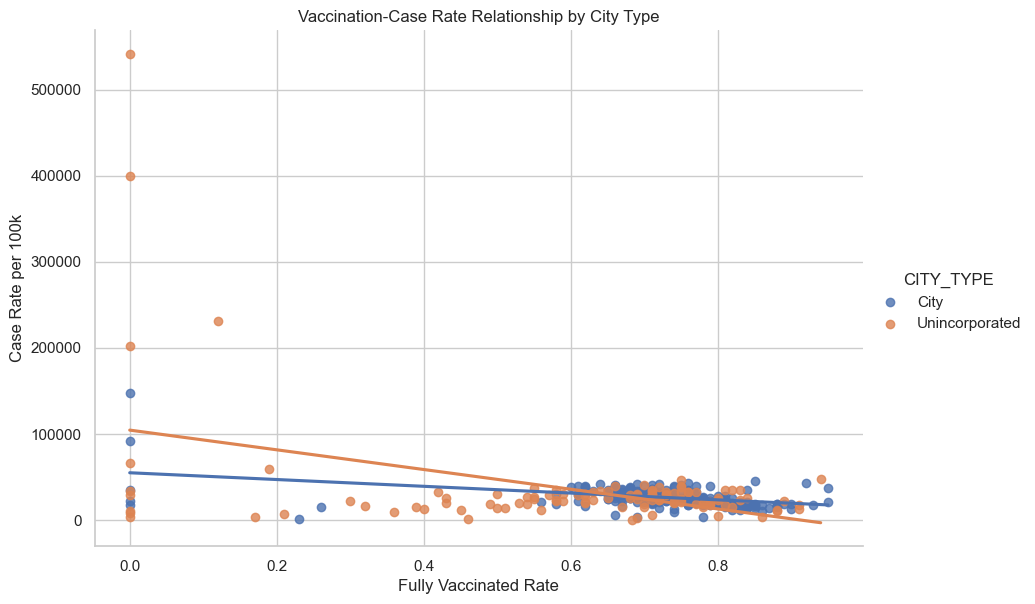

In [227]:
g = sns.lmplot(
    data=df,
    x="Percent_of_People_Fully_Vaccinated",
    y="Case_Rate",
    hue="CITY_TYPE",
    height=6,
    aspect=1.5,
    ci=None
)
g.set_axis_labels("Fully Vaccinated Rate", "Case Rate per 100k")
plt.title("Vaccination-Case Rate Relationship by City Type")
plt.show()

General Trend: Both lines slope downward, indicating that as vaccination rates increase, the case rates tend to decrease for both city types.

The line is slightly steeper, suggesting that cities experience a more significant reduction in case rates with increasing vaccinations.

[CITIES-BETTER ACCESS TO HEALTHCARE ].


